In [164]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

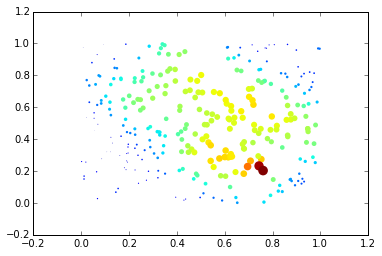

In [165]:
x,y,z = np.load('truth_A.npy')
plt.scatter(x,y,z**2,z, edgecolor='none')

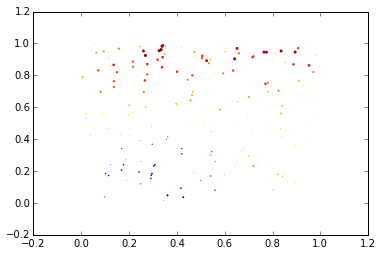

In [166]:
x1,y1,z1 = np.load('truth_B.npy')
plt.scatter(x1,y1,z1**2,z1, edgecolor='none')

In [167]:
xg,yg = np.mgrid[0:1:100j,0:1:100j]

In [168]:
class oi_2d (object):
    """
    Initialize io class with observations, error, and background
    information.
    >>> o = oi(xi, yi, Di, De, B=None, Be=None)
    where:
        xi,yi are the measurement points
        Di are the observations
        De are the observational errors (standard deviation)
        B is a function defining the background field (default = 0.0)
        Be is the background error (default = Di.std())
    
    Methods:
    >>> o.interpolate(x, y, Ro)
    where:
        x,y are the gridpoints.
        Ro is the background error covariance decay scale.
    """    
    def __init__(self, xo, x, yo, y, Ro, Be):
        self.xo = xo            # Measurement points
        self.x = x
        self.Ro = Ro
        self.Be = Be
        # Construct background error covariance matricies
        dx = xo[:,np.newaxis] - x.flatten()[np.newaxis,:]
        dy = yo[:,np.newaxis] - y.flatten()[np.newaxis,:]
        dist = np.sqrt(dx**2+dy**2)
        
        dxv = xo.flatten()[:,np.newaxis] - xo.flatten()[np.newaxis,:]
        dyv = yo.flatten()[:,np.newaxis] - yo.flatten()[np.newaxis,:]
        dist2 = np.sqrt(dxv**2+dyv**2)
        
        self.Bi = np.exp(-(dist)**2/self.Ro**2)*self.Be**2
        self.B = np.exp(-(dist2)**2/self.Ro**2)*self.Be**2
    
    def interpolate(self, Di, De):
        """Return optimally interpolated field and analysis error"""
        self.Di = Di            # Observations
        self.De = De            # Observation error
        self.N = Di.size

        # Construct observational error covariance matrix (diagonal)
        self.O = self.De**2*np.eye(self.N)
        # Weights, analysis and analysis error
        self.W = np.dot(np.linalg.inv(self.B + self.O), self.Bi)
        
        A = np.dot(self.Di,self.W).T 
        Ea = np.diag(np.sqrt( self.Be - np.dot(self.W.T, self.Bi)))
        return A, Ea

In [169]:
Ro = 0.13
Be = 1.0
De = 0.16

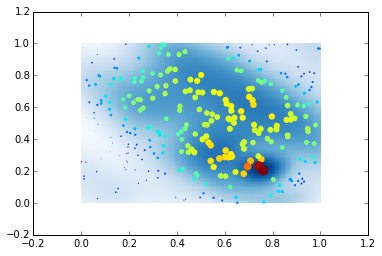

In [170]:
#Truth A
objA =oi_2d(x,xg, y, yg, Ro, Be)
A, Ea = objA.interpolate(z.flatten(), De)
A.shape = (100,100)
plt.pcolormesh(xg,yg, A, cmap="Blues")
plt.scatter(x,y,z**2, z, edgecolor='none')

In [171]:
#check error
import truth
ta = truth.TruthA(xg,yg)
E = np.sum((A-ta.z)**2)/ta.z.size

print E

0.0229025138563


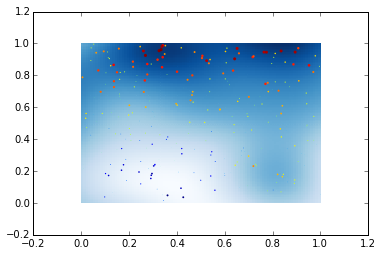

In [172]:
Ro = 0.38
Be = 0.6
De = 0.15
#Truth B
objB =oi_2d(x1,xg, y1, yg, Ro, Be)
B, Eb = objB.interpolate(z1.flatten(), De)
B.shape = (100,100)
plt.pcolormesh(xg,yg, B, cmap="Blues")
plt.scatter(x1,y1, z1**2, z1, edgecolor='none')

In [173]:
#check error
import truth
tb = truth.TruthB(xg,yg)
E = np.sum((B-tb.z)**2)/tb.z.size

print E

0.545026828736
